# Banknote authentication dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Load the dataset
Load the Banknote authentication dataset into a pandas DataFrame.


In [4]:
data = pd.read_csv('Banknote-authentication-dataset.csv')
print(data)

           V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]


In [5]:
# Calculate and display descriptive statistics
display(data.describe())

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


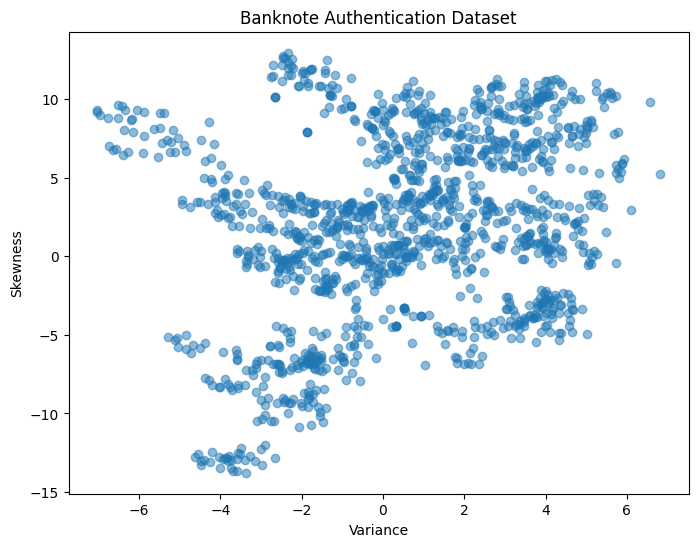

In [6]:
# Visualize the data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['V1'], data['V2'], alpha=0.5)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

## Evaluation of Suitability for K-Means Clustering

The dataset contains two features: Variance (`V1`) and Skewness (`V2`) of banknote images.

The descriptive statistics show the range and distribution of these features.

The scatter plot clearly shows two distinct groups of data points. This visual separation suggests that the data is well-suited for KMeans clustering, as the algorithm aims to partition data into a predefined number of clusters based on feature similarity. The visible clusters indicate that KMeans should be able to identify and separate these groups effectively.

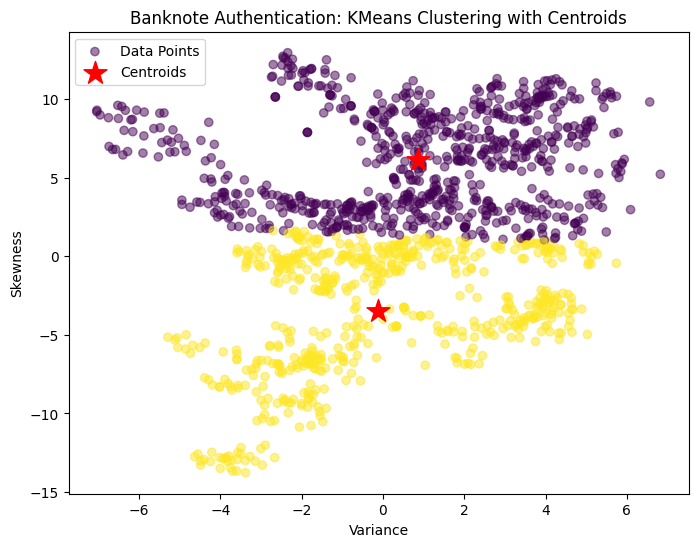

,V1,V2,cluster
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,1
3,3.45660,9.5228,0
4,0.32924,-4.4552,1


from matplotlib import pyplot as plt
_df_0['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='V2', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
data['cluster'] = kmeans.fit_predict(data[['V1', 'V2']])

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(data['V1'], data['V2'], c=data['cluster'], cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication: KMeans Clustering with Centroids')
plt.legend()
plt.show()

# Display the clustered data with cluster assignments
display(data.head())

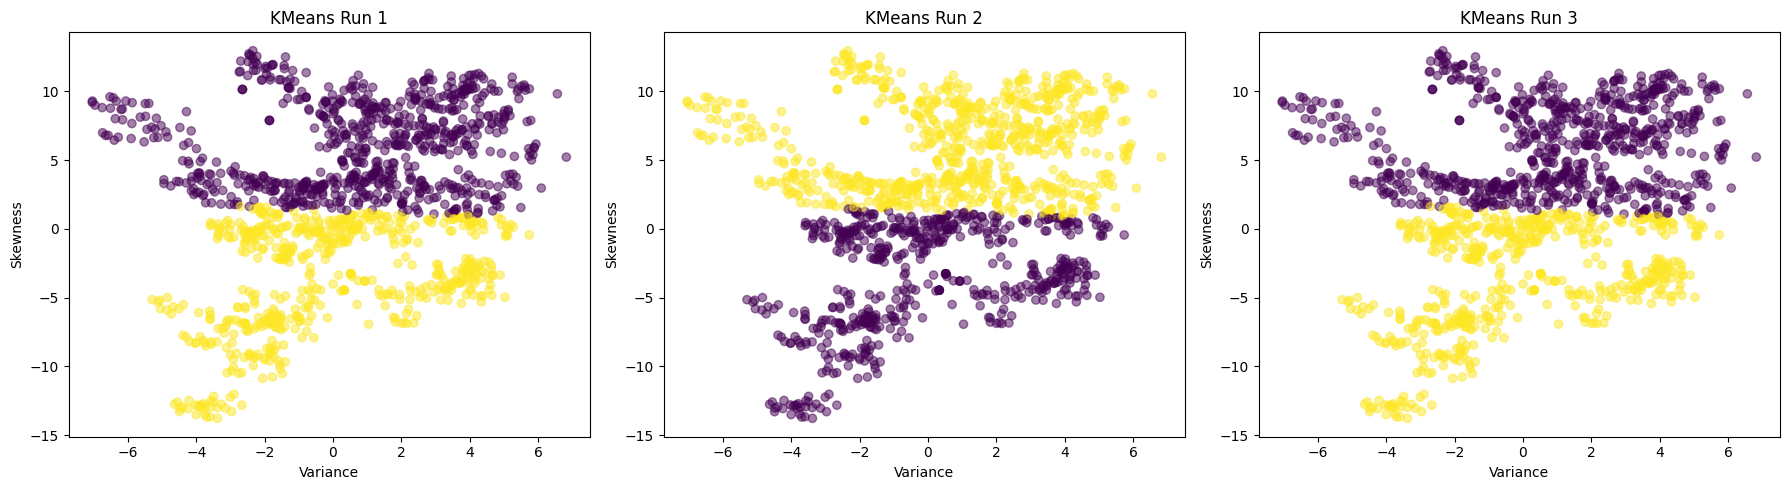

In [8]:
# Re-run KMeans several times and visualize the results
num_runs = 3  # You can change the number of runs
plt.figure(figsize=(18, 5))

for i in range(num_runs):
    kmeans = KMeans(n_clusters=2, random_state=i, n_init=10) # Use different random states for each run
    data[f'cluster_run_{i+1}'] = kmeans.fit_predict(data[['V1', 'V2']])

    plt.subplot(1, num_runs, i + 1)
    plt.scatter(data['V1'], data['V2'], c=data[f'cluster_run_{i+1}'], cmap='viridis', alpha=0.5)
    plt.xlabel('Variance')
    plt.ylabel('Skewness')
    plt.title(f'KMeans Run {i+1}')

plt.tight_layout()
plt.show()

## Comparison of KMeans Results and Stability

We re-ran the KMeans clustering algorithm several times using different random states for initialization. Observing the scatter plots for each run:

- The overall structure of the clusters appears consistent across the different runs. The two distinct groups of data points based on Variance and Skewness are clearly identified in each visualization.
- While the specific assignment of cluster labels (e.g., which cluster is labeled 0 and which is labeled 1) might swap between runs, the fundamental grouping of the data points remains the same.

This indicates that for this dataset with clearly separated clusters, the KMeans algorithm is relatively stable in identifying the core groupings of the data points, despite variations in the initial centroid positions.

In [9]:
data.describe()

,V1,V2,cluster,cluster_run_1,cluster_run_2,cluster_run_3
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,0.436589,0.436589,0.569242,0.436589
std,2.842763,5.869047,0.496144,0.496144,0.495363,0.496144
min,-7.042100,-13.773100,0.000000,0.000000,0.000000,0.000000
25%,-1.773000,-1.708200,0.000000,0.000000,0.000000,0.000000
50%,0.496180,2.319650,0.000000,0.000000,1.000000,0.000000
75%,2.821475,6.814625,1.000000,1.000000,1.000000,1.000000
max,6.824800,12.951600,1.000000,1.000000,1.000000,1.000000
